In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv")
print(df.head())

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [4]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].replace("Yes", 1)
df['Extracurricular Activities'] = df['Extracurricular Activities'].replace("No", 0)

/tmp/ipykernel_18/2030417668.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Extracurricular Activities'] = df['Extracurricular Activities'].replace("No", 0)


In [5]:
print(df.head())

   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0              7               99                           1            9   
1              4               82                           0            4   
2              8               51                           1            7   
3              5               52                           1            5   
4              7               75                           0            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [6]:
df.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


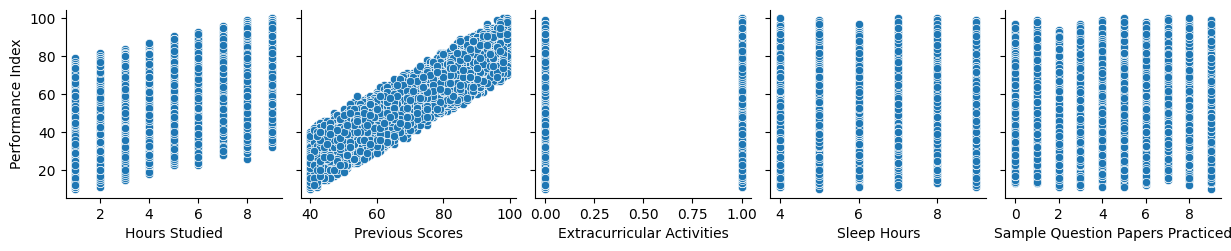

In [7]:
sns.pairplot(df, x_vars=["Hours Studied", "Previous Scores", "Extracurricular Activities", "Sleep Hours","Sample Question Papers Practiced"]
            , y_vars=["Performance Index"])

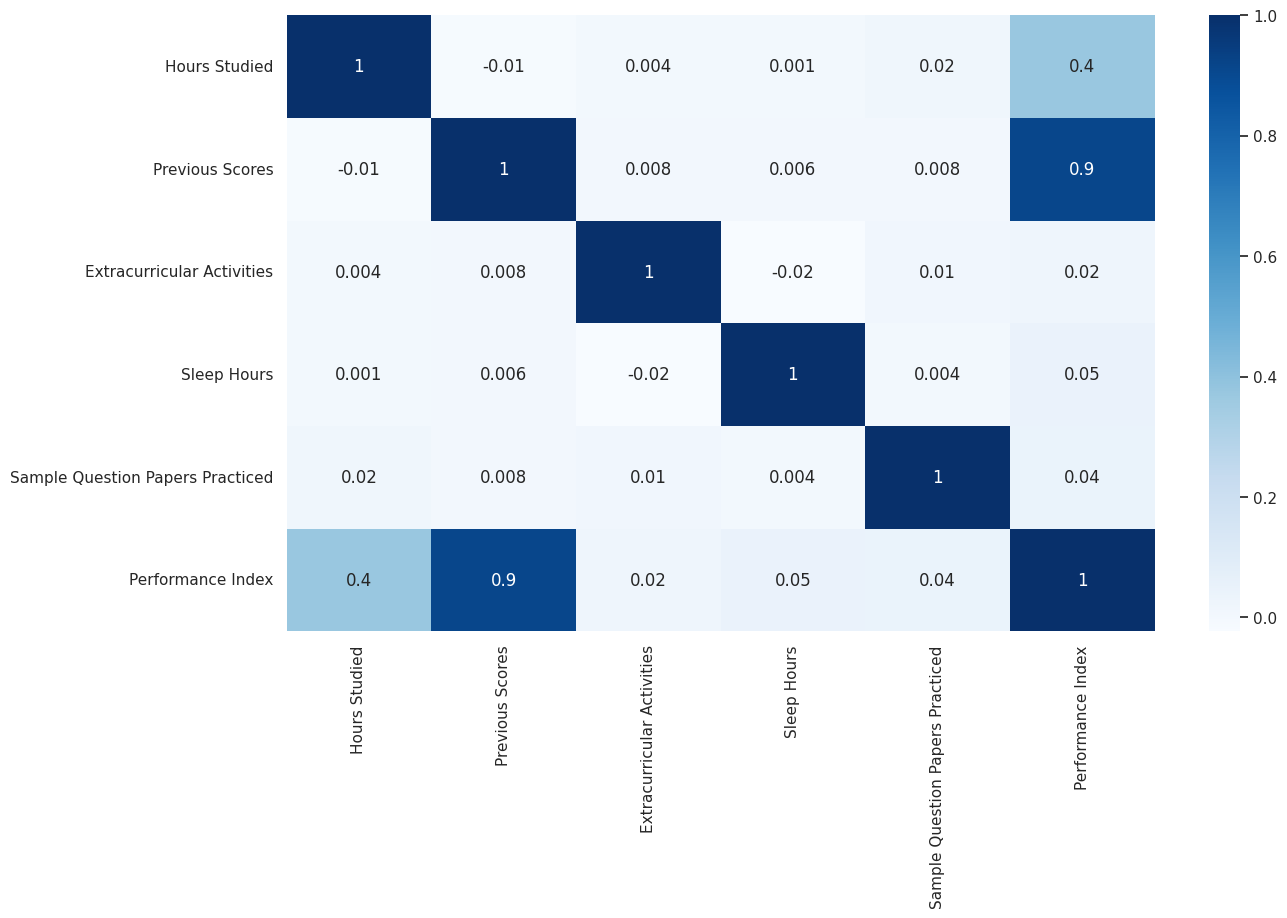

In [8]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

In [9]:
# X consists of Hours Studied, Previous Scores, Extracurricular Activites, Sleep Hours, Sample Question Papers Practiced
X= df.iloc[:,:-1].values
# y consists of Performance Index
y= df.iloc[:,5].values
print(X)
print(y)

[[ 7 99  1  9  1]
 [ 4 82  0  4  2]
 [ 8 51  1  7  2]
 ...
 [ 6 83  1  8  5]
 [ 9 97  1  7  0]
 [ 7 74  0  8  1]]
[91. 65. 45. ... 74. 95. 64.]


In [10]:
# Splitting the dataset 80 for training / 20 for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

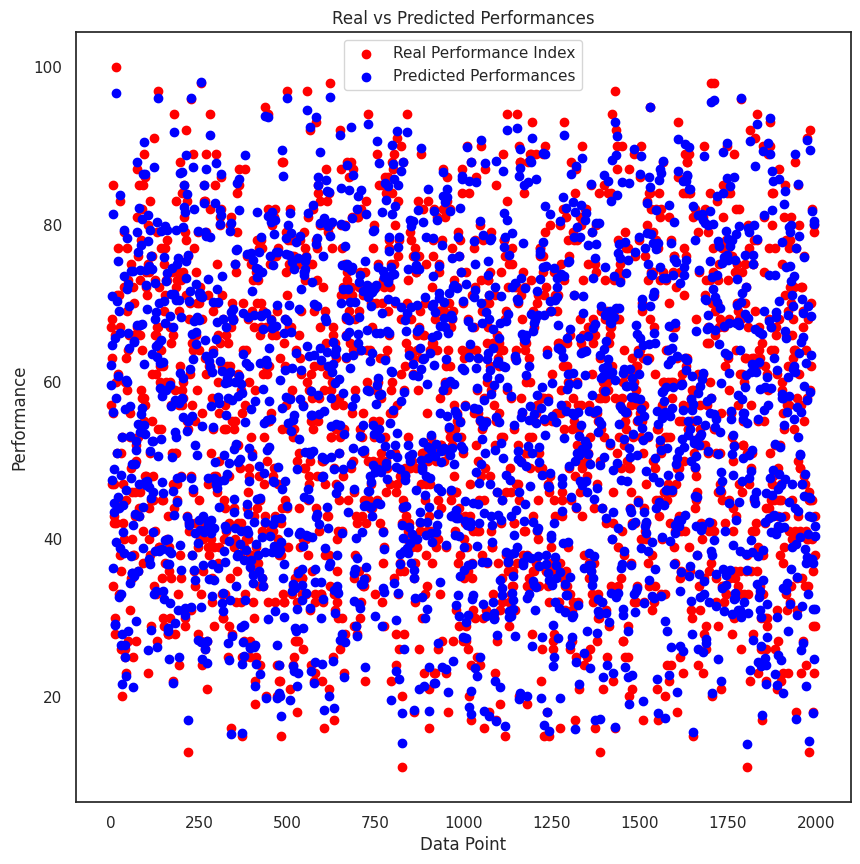

In [11]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

#Viz. of Real Performance Index and predicted performance index
comp = pd.DataFrame({"Real performance index" : y_test, "Predicted performance index" : y_pred})
plt.figure(figsize=(10, 10))
plt.scatter(comp.index, comp["Real performance index"], color='red', label='Real Performance Index')
plt.scatter(comp.index, comp["Predicted performance index"], color='blue', label='Predicted Performances')
plt.xlabel('Data Point')
plt.ylabel('Performance')
plt.title('Real vs Predicted Performances')
plt.legend()
plt.show()

In [12]:
print(f"Coefficients: {regr.coef_}")
print(f"Intercept: {regr.intercept_}")

Coefficients: [2.85563387 1.01869224 0.59572868 0.48002513 0.18876099]
Intercept: -34.05418050016874


In [13]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 4.30
Coefficient of determination: 0.99


In [14]:
regr.predict([[12, 92, 0, 1, 1]])

array([94.60189802])